In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import numpy as np
from scipy.stats import norm

In [3]:
from google.colab import files
uploaded = files.upload()

Saving hospital_cases_GMA.csv to hospital_cases_GMA.csv


In [4]:
'''from google.colab import drive
drive.mount('/content/drive')

import os

# Obtenez le chemin complet du fichier dans votre Google Drive
# file_path = '/content/drive/MyDrive/CAS_Module2_presentation/hospital_cases.csv'
file_path = ''

# Vérifiez si le fichier existe
if os.path.exists(file_path):
    # Faites ce que vous voulez avec le fichier, par exemple le lire avec pandas
    import pandas as pd
    df = pd.read_csv(file_path)
else:
    print("Le fichier n'existe pas.")'''

'from google.colab import drive\ndrive.mount(\'/content/drive\')\n\nimport os\n\n# Obtenez le chemin complet du fichier dans votre Google Drive\n# file_path = \'/content/drive/MyDrive/CAS_Module2_presentation/hospital_cases.csv\'\nfile_path = \'\'\n\n# Vérifiez si le fichier existe\nif os.path.exists(file_path):\n    # Faites ce que vous voulez avec le fichier, par exemple le lire avec pandas\n    import pandas as pd\n    df = pd.read_csv(file_path)\nelse:\n    print("Le fichier n\'existe pas.")'

In [5]:
df = pd.read_csv('hospital_cases_GMA.csv')

Create Base DF

In [6]:
df_noUni = df[df['Uni'] == 0]
df_Uni = df[df['Uni'] == 1]
df_Ro = df[(df['Reg'] == 'RO') & (df['Uni'] == 0)]
df_Al = df[(df['Reg'] == 'AL') & (df['Uni'] == 0)]

# Analysis of the whole Dataset


## Histogram of C-Section Percentage

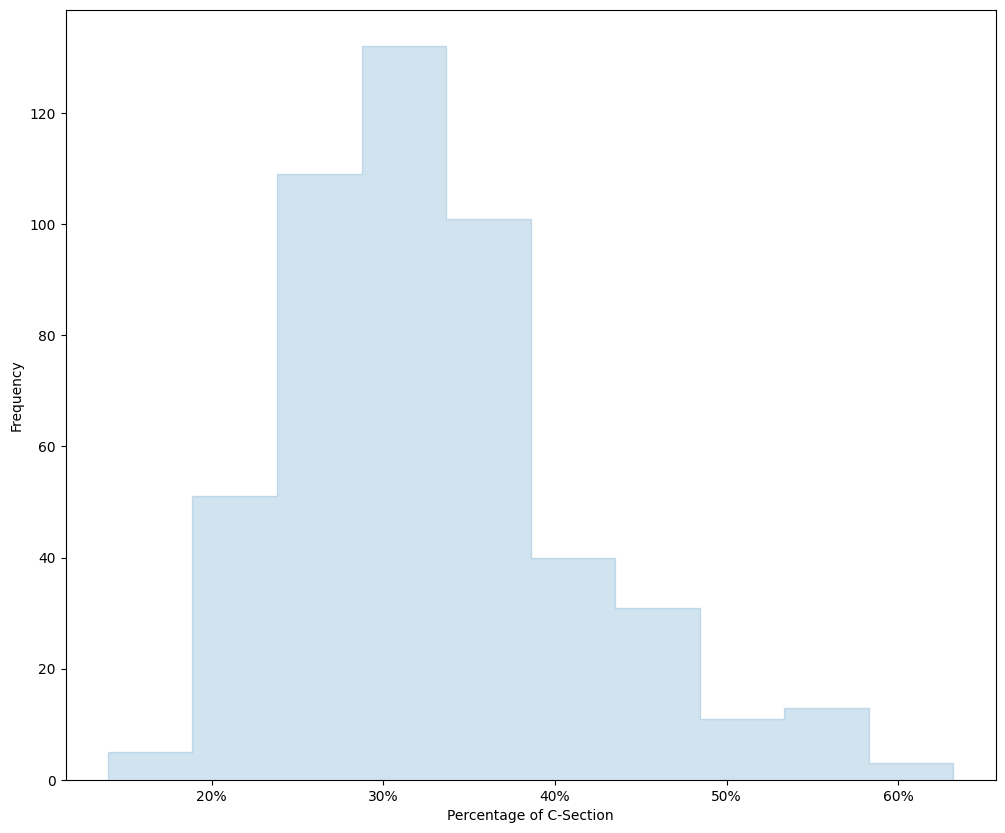

In [7]:
plt.figure(figsize=(12,10))
df['percentage_c-section'].plot(kind="hist",fill=True,alpha=0.2,histtype='step')
plt.xlabel('Percentage of C-Section')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

With the Probality density function

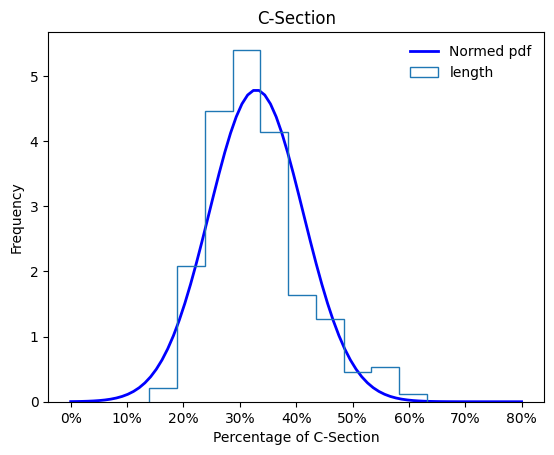

In [8]:
# Create figure and axis
fig, ax = plt.subplots(1,1)
mean = df['percentage_c-section'].describe()[1]
sd = df['percentage_c-section'].describe()[2]
x = np.linspace(0,0.8,80)
ax.plot(x, norm.pdf(x,mean,sd),'b-', lw=2, label='Normed pdf')
df['percentage_c-section'].plot(kind="hist",fill=False,histtype='step',title='C-Section', label="length", density="True")
ax.legend(loc='best', frameon=False)
plt.xlabel('Percentage of C-Section')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.show()

Skew and kurtosis

In [9]:
stats.skew(df['percentage_c-section'])

0.8723648106189587

In [10]:
stats.kurtosis(df['percentage_c-section'])

0.7997155024823122

## QQ plot

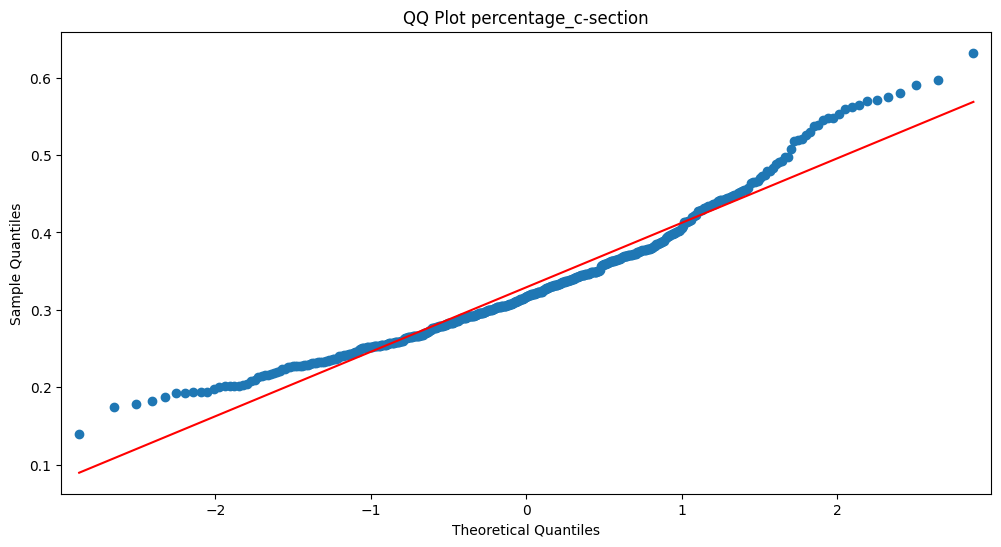

In [11]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sm.qqplot(df['percentage_c-section'], line='s', ax=ax1)
ax1.set_title('QQ Plot percentage_c-section')

plt.show()

The QQ plot seems to indicate that the distribution is not normal

## D'Agostino Pearson test

In [12]:
k2, p = stats.normaltest(df['percentage_c-section']) # D Agostino-Pearson. The method returns the test statistic value and the p-value
alpha = 0.001 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis (data follow a normal distribution) can be rejected")
else:
  print("The null hypothesis (data follow a normal distribution) cannot be rejected")

Alpha =  0.001
p =  2.928994815743454e-13
The null hypothesis (data follow a normal distribution) can be rejected


The D'Agostino-Pearson test also shows that the distribution is not normal

## Using the log function to get a normal distribution

We can try to use the log to obtains a normal distribution

In [13]:
df_Ro['log_c-section'] = np.log(df_Ro['percentage_c-section']*100)  #multiply by 100 to convert for example 0.3 to 30 so the log is a positive value
df_Al['log_c-section'] = np.log(df_Al['percentage_c-section']*100)
df['log_c-section'] = np.log(df['percentage_c-section']*100)
df_Uni['log_c-section'] = np.log(df_Uni['percentage_c-section']*100)  #multiply by 100 to convert for example 0.3 to 30 so the log is a positive value
df_noUni['log_c-section'] = np.log(df_noUni['percentage_c-section']*100)

<ipython-input-13-bd0fef79e46d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ro['log_c-section'] = np.log(df_Ro['percentage_c-section']*100)  #multiply by 100 to convert for example 0.3 to 30 so the log is a positive value
<ipython-input-13-bd0fef79e46d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Al['log_c-section'] = np.log(df_Al['percentage_c-section']*100)
<ipython-input-13-bd0fef79e46d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

### Histogram ot the log c-section

Text(0.5, 1.0, 'Hisogram of the Log C-section')

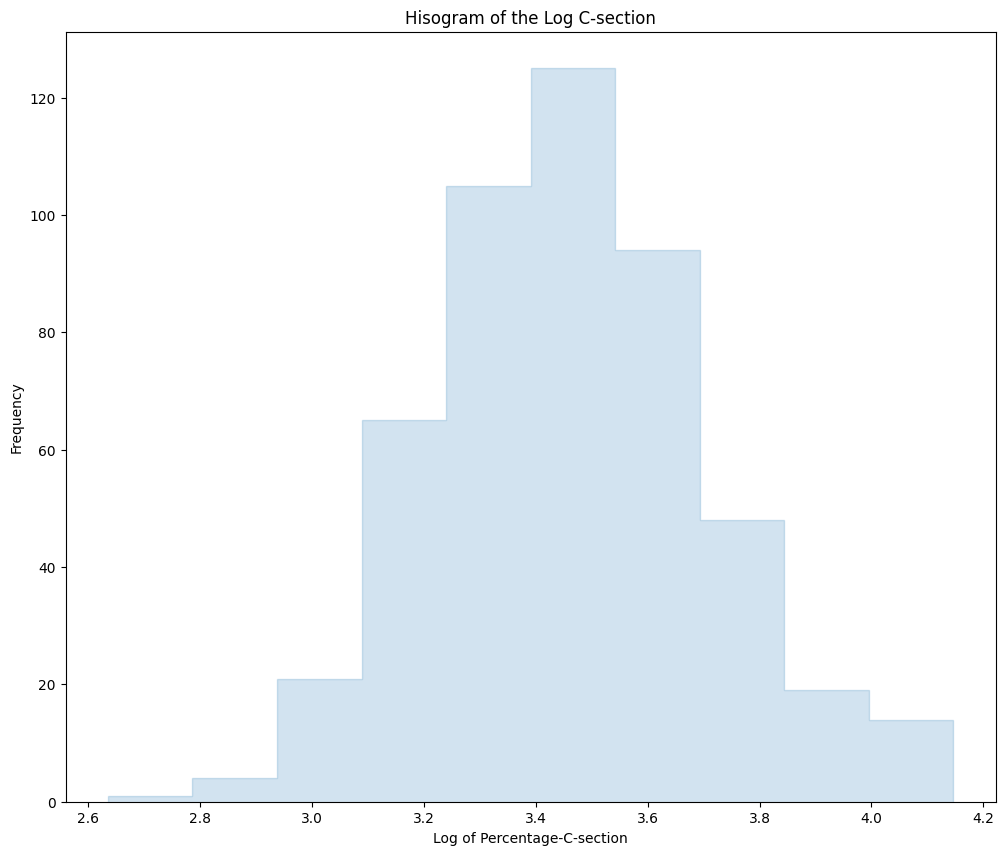

In [14]:
plt.figure(figsize=(12,10))
df['log_c-section'].plot(kind="hist",fill=True,alpha=0.2,histtype='step')
plt.xlabel('Log of Percentage-C-section')
plt.title('Hisogram of the Log C-section')

With the probality density function

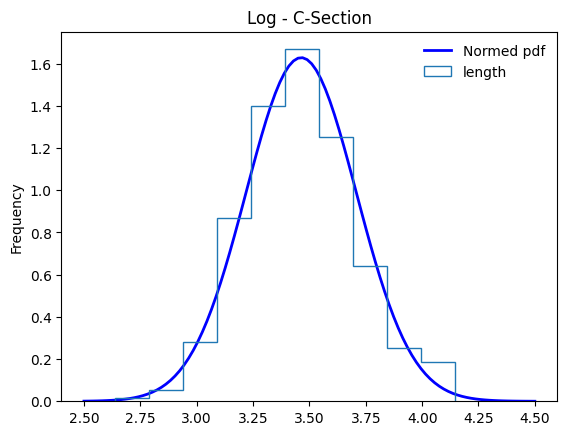

In [15]:
# Create figure and axis
fig, ax = plt.subplots(1,1)
mean = df['log_c-section'].describe()[1]
sd = df['log_c-section'].describe()[2]
x = np.linspace(2.5,4.5,100)
ax.plot(x, norm.pdf(x,mean,sd),'b-', lw=2, label='Normed pdf')
df['log_c-section'].plot(kind="hist",fill=False,histtype='step',title='Log - C-Section', label="length", density="True")
ax.legend(loc='best', frameon=False)
plt.show()

Skew and kurtosis

In [16]:
stats.skew(df['log_c-section'])

0.1597116572206211

In [17]:
stats.kurtosis(df['log_c-section'])

0.011447297819400681

### QQ Plot

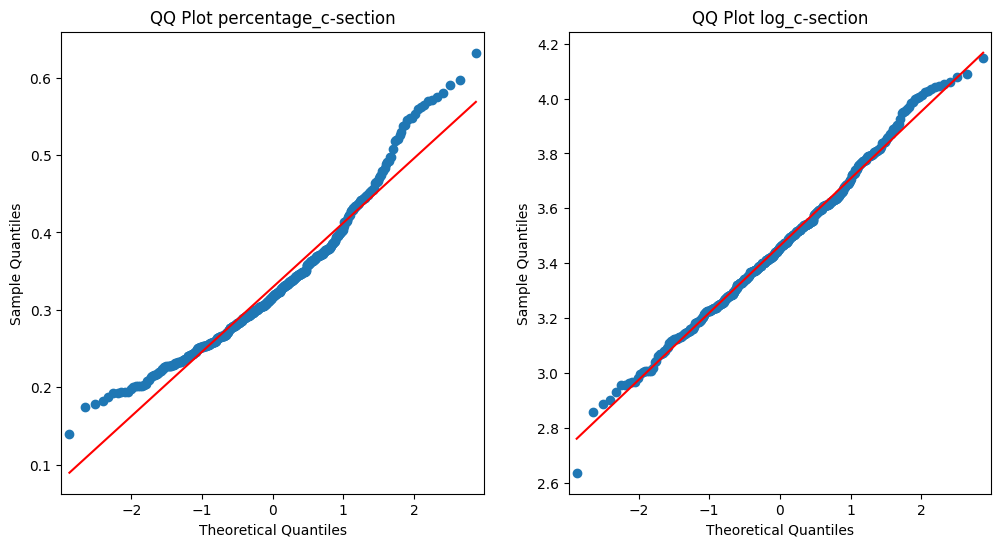

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sm.qqplot(df['percentage_c-section'], line='s', ax=ax1)
ax1.set_title('QQ Plot percentage_c-section')

sm.qqplot(df['log_c-section'], line='s', ax=ax2)
ax2.set_title('QQ Plot log_c-section')

plt.show()

We can cleary see a difference between the QQ-plot of the *Percentage C-section* and the *Log of Percentage C-section*

### D'Agostino-Pearson test

In [19]:
k2, p = stats.normaltest(df['log_c-section']) # D Agostino-Pearson. The method returns the test statistic value and the p-value
alpha = 0.001 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis (data follow a normal distribution) can be rejected")
else:
  print("The null hypothesis (data follow a normal distribution) cannot be rejected")

Alpha =  0.001
p =  0.33459689003138177
The null hypothesis (data follow a normal distribution) cannot be rejected


The D'agostino-Pearson test ant the QQ-plot strongly indicate that the distriubtion follows a normal distribution.


**We now have a normal distribution that we can use for regression**

# Comparaison of means between Western Switzerland and German Switzerland

As our data is not distributed according to the normal law, we can do a Mann-Whitney U test to see if the two populations are equal

In [20]:
df['log_c-section'].describe()

count    496.000000
mean       3.463519
std        0.244934
min        2.635730
25%        3.288318
50%        3.457077
75%        3.612816
max        4.146394
Name: log_c-section, dtype: float64

In [21]:
df_Ro['log_c-section'].describe()

count    108.000000
mean       3.407077
std        0.228261
min        2.884981
25%        3.247512
50%        3.373187
75%        3.552259
max        4.002596
Name: log_c-section, dtype: float64

In [22]:
df_Al['log_c-section'].describe()

count    353.000000
mean       3.471097
std        0.248944
min        2.635730
25%        3.300959
50%        3.472799
75%        3.613978
max        4.146394
Name: log_c-section, dtype: float64

In [23]:
df_Uni['log_c-section'].describe()

count    35.000000
mean      3.561242
std       0.217482
min       3.187001
25%       3.369936
50%       3.556203
75%       3.771977
max       3.858796
Name: log_c-section, dtype: float64

In [24]:
df_noUni['log_c-section'].describe()

count    461.000000
mean       3.456099
std        0.245519
min        2.635730
25%        3.283414
50%        3.448738
75%        3.608749
max        4.146394
Name: log_c-section, dtype: float64

### Mann–Whitney U test

In statistics, the Mann–Whitney U test is a nonparametric test of the null hypothesis that, for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X.

The null hypothesis (H0) is that the two populations are equal.

The alternative hypothesis (H1) is that the two populations are not equal.

In [25]:
f, p = stats.mannwhitneyu(df_Ro['percentage_c-section'],df_Al['percentage_c-section'], alternative='two-sided')
print("There is %1.2f probability that's the null hypothesis is wrong" % ((1-p)*100))

There is 99.44 probability that's the null hypothesis is wrong


It looks like there is a difference between the Western Switzerland hospitals and the German Switzerland one

In [26]:
f, p = stats.mannwhitneyu(df_Uni['percentage_c-section'],df_noUni['percentage_c-section'], alternative='two-sided')
print("There is %1.2f probability that's the null hypothesis is wrong" % ((1-p)*100))

There is 98.84 probability that's the null hypothesis is wrong


The difference is even more important between university hospitals and others

### Welsch's t-test

In order to compare the mean of the two regions we use a Welsch's t-test. As we need a normal distribution to do a Welsch's t-test, we use the log version of our datasets.

 Welch's t-test, or unequal variances t-test, is a two-sample location test which is used to test the (null) hypothesis that two populations have equal means.

In [70]:
f, p  = stats.ttest_ind(df_Ro['log_c-section'],df_Al['log_c-section'], equal_var = False, alternative='two-sided') # False means we don't assume equal variances (Welsch's t-test)
print('T-test for German- vs Latin-speaking Regions: p = %1.3f' % p)
alpha = 0.05 # Rejection criterion defined by you
print('Alpha = ',alpha)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis (two populations have equal means) can be rejected")
else:
  print("The null hypothesis (two populations have equal means) cannot be rejected")

T-test for German- vs Latin-speaking Regions: p = 0.013
Alpha =  0.05
The null hypothesis (two populations have equal means) can be rejected


As shown by the test, we cannot reject the hypothesis that the two populations have equal means.

Let's try to do the same for the university hospitals vs the other ones

In [71]:
f, p  = stats.ttest_ind(df_Uni['log_c-section'],df_noUni['log_c-section'], equal_var = True, alternative='two-sided') # False means we don't assume equal variances (Welsch's t-test)
print('T-test for University vs Non-University Hospitals: p = %1.3f' % p)
alpha = 0.05 # Rejection criterion defined by you
print('Alpha = ',alpha)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis (two populations have equal means) can be rejected")
else:
  print("The null hypothesis (two populations have equal means) cannot be rejected")

T-test for University vs Non-University Hospitals: p = 0.014
Alpha =  0.05
The null hypothesis (two populations have equal means) can be rejected


In this case, we can reject the hypothesis that the mean of the log of C-sections in university hospitals is the same as in other hospitals.

### Anova test

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean (a generalisation of the t-test to more than two samples). The test is applied to samples from two or more groups, possibly with differing sizes.

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.


1.   The samples are independent.
2.   Each sample is from a normally distributed population.
3.   The population standard deviations of the groups are all equal. This property is known as homoscedasticity



In [29]:
f, p_value = stats.f_oneway(df_Ro['log_c-section'],df_Al['log_c-section'])
print('One way Anova: p = %1.3f' % p_value)
alpha = 0.05 # Rejection criterion defined by you
print('Alpha = ',alpha)
if p_value < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis (two populations have equal means) can be rejected")
else:
  print("The null hypothesis (two populations have equal means) cannot be rejected")

One way Anova: p = 0.018
Alpha =  0.05
The null hypothesis (two populations have equal means) can be rejected


In [30]:
f, p_value = stats.f_oneway(df_Uni['log_c-section'],df_noUni['log_c-section'])
print('One way Anova: p = %1.3f' % p_value)
alpha = 0.05 # Rejection criterion defined by you
print('Alpha = ',alpha)
if p_value < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis (two populations have equal means) can be rejected")
else:
  print("The null hypothesis (two populations have equal means) cannot be rejected")

One way Anova: p = 0.014
Alpha =  0.05
The null hypothesis (two populations have equal means) can be rejected


We obtain the same conclusion as with the Welsch's t-test. We cannot reject the hypothesis that the average number of cesareans in French-speaking hospitals is different from the one in Swiss German hospitals.

On the other hand, we can reject this hypothesis for university hospitals compared to other hospitals.

# Old

In [31]:
df_Uni_grp = df_Uni.groupby(['year']).sum()
df_Uni_grp['percentage_c-section'] = df_Uni_grp['cases_c-section']/df_Uni_grp['delivery']

df_noUni_grp = df_noUni.groupby(['year']).sum()
df_noUni_grp['percentage_c-section'] = df_noUni_grp['cases_c-section']/df_noUni_grp['delivery']

df_Ro_grp = df_Ro.groupby(['year']).sum()
df_Ro_grp['percentage_c-section'] = df_Ro_grp['cases_c-section']/df_Ro_grp['delivery']

df_Al_grp = df_Al.groupby(['year']).sum()
df_Al_grp['percentage_c-section'] = df_Al_grp['cases_c-section']/df_Al_grp['delivery']

<ipython-input-31-c0d1d801839f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Uni_grp = df_Uni.groupby(['year']).sum()
<ipython-input-31-c0d1d801839f>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_noUni_grp = df_noUni.groupby(['year']).sum()
<ipython-input-31-c0d1d801839f>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Ro_grp = df_Ro.groupby(['year']).sum()
<ipython-input-31-c0d1d801839f>:10: FutureWarni

University VS Standard

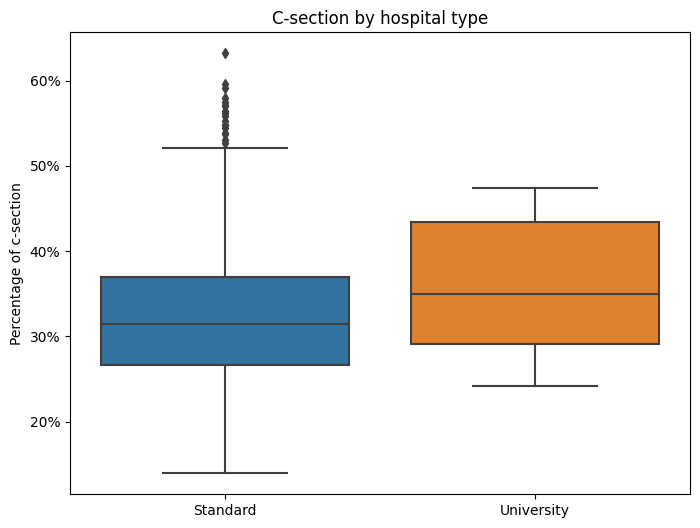

In [32]:
# Créez un graphique à l'aide de Seaborn
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Uni', y='percentage_c-section', data=df)

# Renommez les étiquettes de l'axe des abscisses
ax.set_xticklabels(['Standard', 'University'])

# Définissez un formateur personnalisé pour l'axe y en pourcentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.set_xlabel('')

plt.title('C-section by hospital type')

plt.ylabel('Percentage of c-section')
plt.show()

Western Switzerland VS German Switzerland

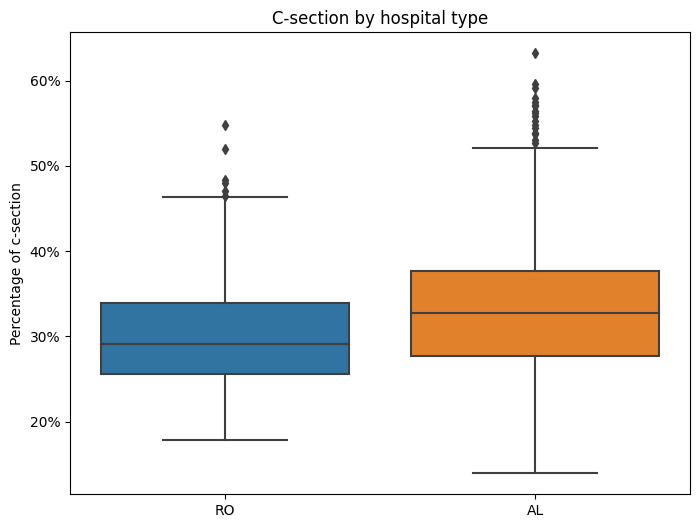

In [33]:
# Créez un graphique à l'aide de Seaborn
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Reg', y='percentage_c-section', data=df)

# Définissez un formateur personnalisé pour l'axe y en pourcentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.set_xlabel('')

plt.title('C-section by hospital type')

plt.ylabel('Percentage of c-section')
plt.show()

Graph by year

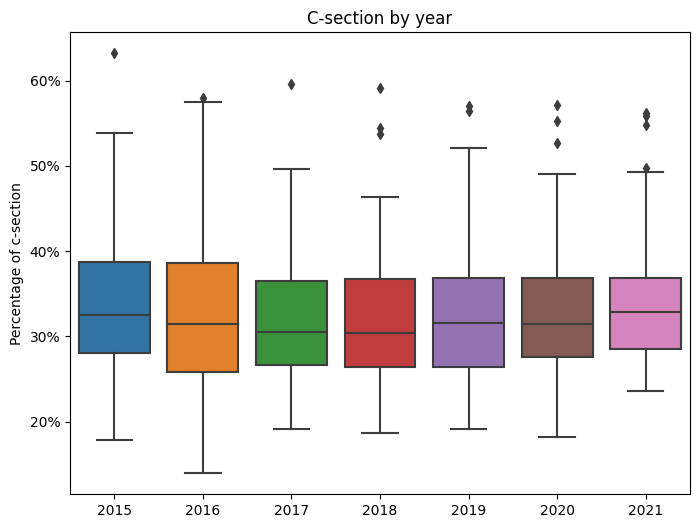

In [34]:
# Créez un graphique à l'aide de Seaborn
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='year', y='percentage_c-section', data=df)

# Définissez un formateur personnalisé pour l'axe y en pourcentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.set_xlabel('')

plt.title('C-section by year')

plt.ylabel('Percentage of c-section')
plt.show()

C-Section between Western CH and German CH

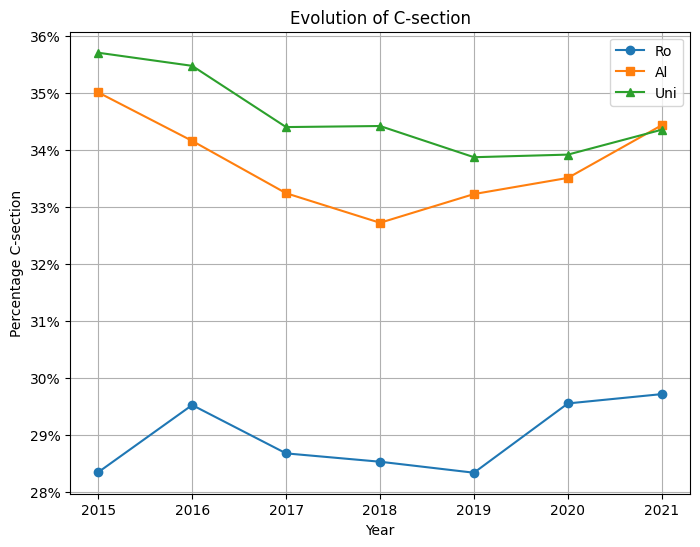

In [35]:
# Créez un graphique en ligne
plt.figure(figsize=(8, 6))
plt.plot(df_Ro_grp.index, df_Ro_grp['percentage_c-section'], marker='o', linestyle='-', label='Ro')

# Ajoutez un deuxième graphique en ligne pour la deuxième série de données (autre_serie)
plt.plot(df_Al_grp.index, df_Al_grp['percentage_c-section'], marker='s', linestyle='-', label='Al')

# Ajoutez un deuxième graphique en ligne pour la deuxième série de données (autre_serie)
plt.plot(df_Uni_grp.index, df_Uni_grp['percentage_c-section'], marker='^', linestyle='-', label='Uni')

plt.title('Evolution of C-section')
plt.xlabel('Year')
plt.ylabel('Percentage C-section')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.grid(True)
plt.legend()
plt.show()


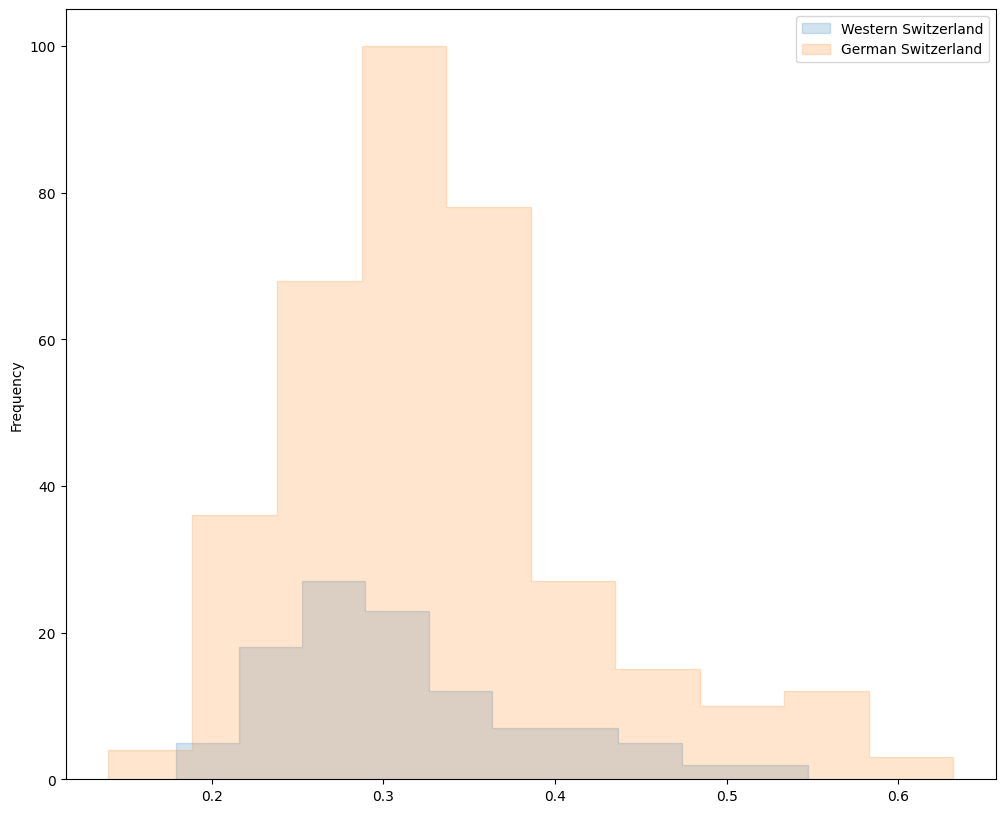

In [36]:
datasets = [df_Ro['percentage_c-section'], df_Al['percentage_c-section']]
dataset_labels = ['Western Switzerland', 'German Switzerland']
plt.figure(figsize=(12,10))
i=0
for dataset in datasets[0:2]:
    dataset.plot(kind="hist",fill=True,alpha=0.2,histtype='step',label=dataset_labels[i])
    #print('%10s %1.2f ' % (datasets_labels[i],p))
    i+=1
plt.legend()

In [37]:
stats.skew(df_Ro['percentage_c-section'])

0.9759652402326211

In [38]:
stats.skew(df_Al['percentage_c-section'])

0.9183242866547774

In [39]:
stats.kurtosis(df_Ro['percentage_c-section'])

0.552096489439736

In [40]:
stats.kurtosis(df_Al['percentage_c-section'])

1.0509152836430982

## Normality Test

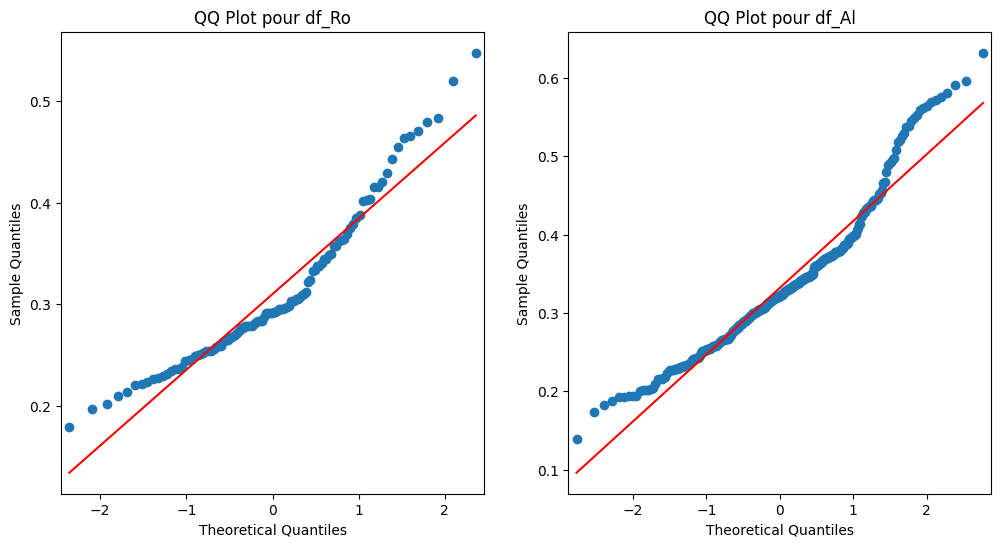

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df_Ro = df_Ro.dropna(subset=['percentage_c-section'])
df_Al = df_Al.dropna(subset=['percentage_c-section'])

sm.qqplot(df_Ro['percentage_c-section'], line='s', ax=ax1)
ax1.set_title('QQ Plot pour df_Ro')

sm.qqplot(df_Al['percentage_c-section'], line='s', ax=ax2)
ax2.set_title('QQ Plot pour df_Al')

plt.show()

It is hard to say that the distributions follow a normal one from the QQ plots

Let's try to test the normality of the distribution by using D'Agostino Pearson:

In [42]:
k2, p = stats.normaltest(df['percentage_c-section']) # D Agostino-Pearson. The method returns the test statistic value and the p-value
alpha = 0.001 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis (data follow a normal distribution) can be rejected")
else:
  print("The null hypothesis (data follow a normal distribution) cannot be rejected")

Alpha =  0.001
p =  2.928994815743454e-13
The null hypothesis (data follow a normal distribution) can be rejected


In [43]:
k2, p = stats.normaltest(df_Ro['percentage_c-section']) # D Agostino-Pearson. The method returns the test statistic value and the p-value
alpha = 0.001 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis (data follow a normal distribution) can be rejected")
else:
  print("The null hypothesis (data follow a normal distribution) cannot be rejected")

Alpha =  0.001
p =  0.0002919865640901235
The null hypothesis (data follow a normal distribution) can be rejected


In [44]:
k2, p = stats.normaltest(df_Al['percentage_c-section']) # D Agostino-Pearson. The method returns the test statistic value and the p-value
alpha = 0.001 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis (data follow a normal distribution) can be rejected")
else:
  print("The null hypothesis (data follow a normal distribution) cannot be rejected")

Alpha =  0.001
p =  4.1656845309394645e-11
The null hypothesis (data follow a normal distribution) can be rejected


## Analyse of the means

In [45]:
df_Ro['percentage_c-section'].describe()

count    108.000000
mean       0.309918
std        0.074857
min        0.179032
25%        0.257264
50%        0.291714
75%        0.348921
max        0.547401
Name: percentage_c-section, dtype: float64

In [46]:
df_Al['percentage_c-section'].describe()

count    353.000000
mean       0.331925
std        0.085371
min        0.139535
25%        0.271386
50%        0.322268
75%        0.371134
max        0.632056
Name: percentage_c-section, dtype: float64

Let's now test the hypothesis that the two samples have different means

### Mann–Whitney U test

In statistics, the Mann–Whitney U test is a nonparametric test of the null hypothesis that, for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X.

The null hypothesis (H0) is that the two populations are equal.

The alternative hypothesis (H1) is that the two populations are not equal.

In [47]:
f, p = stats.mannwhitneyu(df_Ro['percentage_c-section'],df_Al['percentage_c-section'], alternative='two-sided')
print("There is %1.2f probability that's the null hypothesis is wrong" % ((1-p)*100))

There is 99.44 probability that's the null hypothesis is wrong


In [48]:
f, p = stats.mannwhitneyu(df_Uni['percentage_c-section'],df_noUni['percentage_c-section'], alternative='two-sided')
print("There is %1.2f probability that's the null hypothesis is wrong" % ((1-p)*100))

There is 98.84 probability that's the null hypothesis is wrong


In [49]:
p

0.011614710191549183

We can compute the Kolmogorov-Smirnov statistic on 2 samples. This is a test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution.

In [50]:
f, p = stats.ks_2samp(df_Ro['percentage_c-section'],df_Al['percentage_c-section'])
print("There is %1.2f probability that's the null hypothesis is wrong" % ((1-p)*100))

There is 99.98 probability that's the null hypothesis is wrong


**Interpretation:** It is unlikely that these sets come from the same population.

### ANOVA test

Python stats module provides a one-way Anova test. The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean (a generalisation of the t-test to more than two samples). The test is applied to samples from two or more groups, possibly with differing sizes.

In [51]:
f, p_value = stats.f_oneway(df_Ro['percentage_c-section'],df_Al['percentage_c-section'])
print('One way Anova: p = %1.3f' % p_value)

One way Anova: p = 0.016


In [52]:
f, p_value = stats.f_oneway(df_Uni['percentage_c-section'],df_noUni['percentage_c-section'])
print('One way Anova: p = %1.3f' % p_value)

One way Anova: p = 0.022


## Yearly Histogram

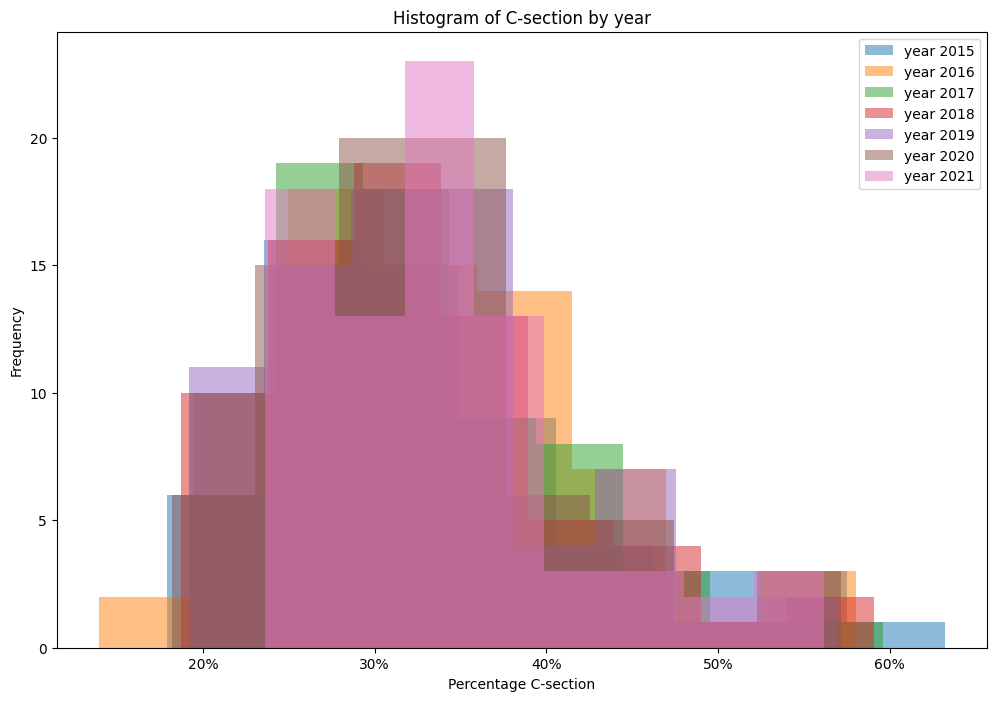

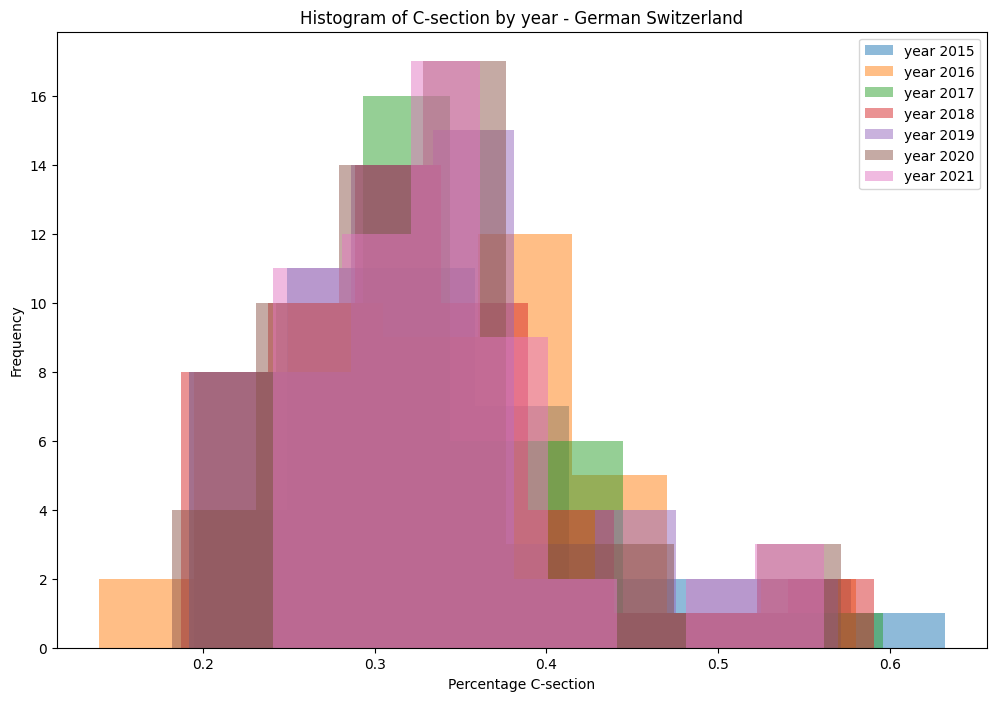

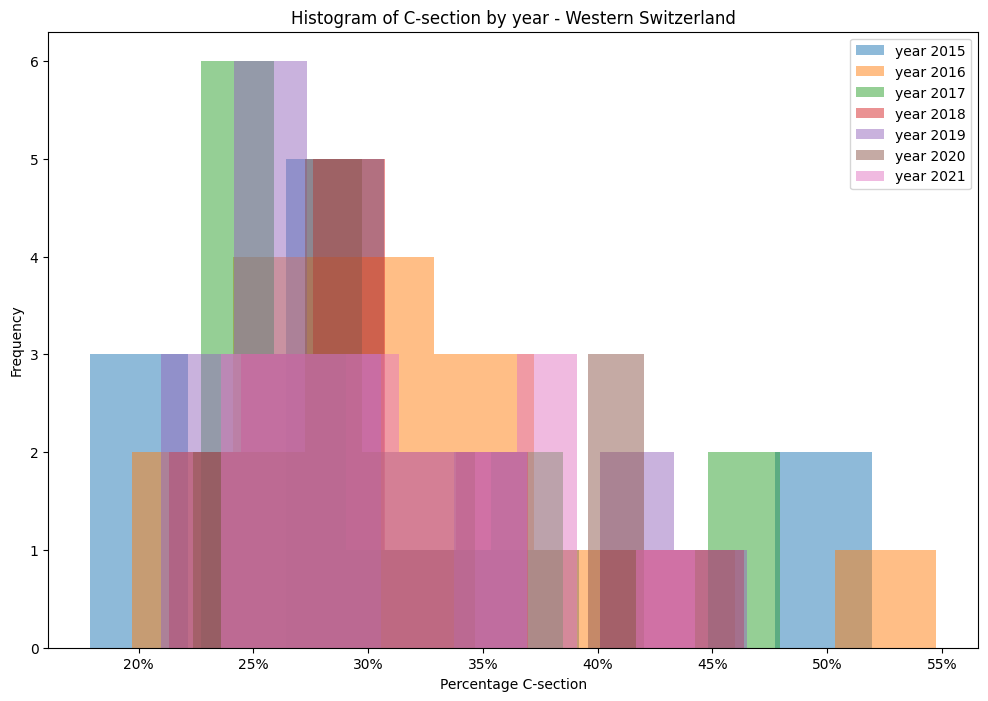

In [53]:
years = df_Al['year'].unique()

####################### Switzerland ###########################################

# Créez un sous-graphique (subplot) pour tous les histogrammes
plt.figure(figsize=(12, 8))

# Parcourez chaque année et ajoutez un histogramme pour cette année sur le même graphique
for year in years:
    data_for_year = df[df['year'] == year]
    plt.hist(data_for_year['percentage_c-section'], bins=8, alpha=0.5, label=f'year {year}')

plt.title('Histogram of C-section by year')
plt.xlabel('Percentage C-section')
plt.ylabel('Frequency')
plt.legend()
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Affichez le graphique combiné
plt.show()

####################### German Switzerland ###########################################

# Créez un sous-graphique (subplot) pour tous les histogrammes
plt.figure(figsize=(12, 8))

# Parcourez chaque année et ajoutez un histogramme pour cette année sur le même graphique
for year in years:
    data_for_year = df_Al[df_Al['year'] == year]
    plt.hist(data_for_year['percentage_c-section'], bins=8, alpha=0.5, label=f'year {year}')

plt.title('Histogram of C-section by year - German Switzerland')
plt.xlabel('Percentage C-section')
plt.ylabel('Frequency')
plt.legend()

# Affichez le graphique combiné
plt.show()

####################### Western Switzerland ###########################################

years = df_Ro['year'].unique()
# Créez un sous-graphique (subplot) pour tous les histogrammes
plt.figure(figsize=(12, 8))

# Parcourez chaque année et ajoutez un histogramme pour cette année sur le même graphique
for year in years:
    data_for_year = df_Ro[df_Ro['year'] == year]
    plt.hist(data_for_year['percentage_c-section'], bins=8, alpha=0.5, label=f'year {year}')

plt.title('Histogram of C-section by year - Western Switzerland')
plt.xlabel('Percentage C-section')
plt.ylabel('Frequency')
plt.legend()
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Affichez le graphique combiné
plt.show()




In [54]:
df.head()

,hospital,canton,delivery,year,cases_c-section,cases_kidney,Reg,Uni,percentage_c-section,to_delete,Doctor,Doctor_in_formation,Nurse,Other_Nurse,Total_staff,Operation_rooms,Delivery_rooms,Private_division,Beds,log_c-section
0,Les Hôpitaux Universitaires de Genève HUG,GE,4048,2015,1196.0,35.0,RO,1,0.295455,0,1676.08,NaN,4200.28,983.58,9936.21,38.0,7.0,0.0959,938.9,3.385930
1,CHUV Centre Hospitalier Universitaire Vaudois,VD,2909,2015,963.0,52.0,RO,1,0.331042,0,1586.90,NaN,3263.07,1578.87,9413.29,29.0,6.0,0.0726,888.0,3.499659
2,Universitätsspital Zürich,ZH,2839,2015,1226.0,83.0,AL,1,0.431842,0,1205.53,NaN,2207.53,1049.24,6431.54,34.0,8.0,0.2013,947.4,3.765475
3,Universitätsspital Basel,BS,2509,2015,912.0,80.0,AL,1,0.363491,0,877.81,NaN,1676.80,610.12,4764.80,24.0,5.0,0.2175,618.0,3.593171
4,Spital Thurgau AG Kantonsspitäler Frauenfeld &...,TG,2338,2015,600.0,NaN,AL,0,0.256630,0,351.83,NaN,996.58,300.13,2072.62,20.0,10.0,0.1521,533.0,3.245049


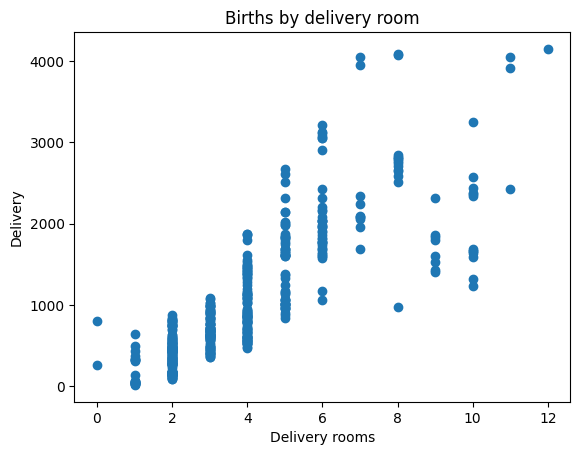

In [55]:
# Créez un scatter plot
plt.scatter(df['Delivery_rooms'], df['delivery'])

# Ajoutez des étiquettes d'axe et un titre
plt.xlabel('Delivery rooms')
plt.ylabel('Delivery')
plt.title('Births by delivery room')
# Affichez le plot
plt.show()


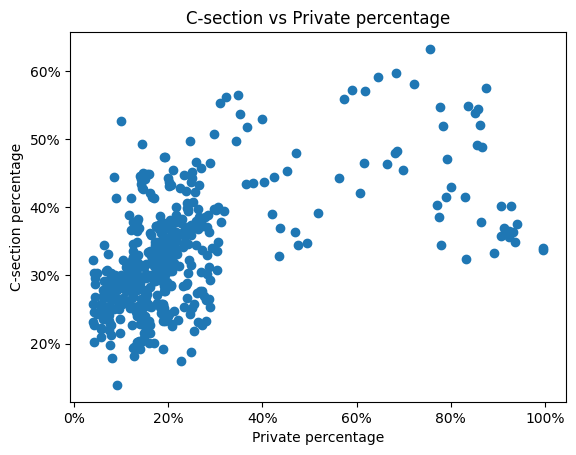

In [56]:
# Créez un scatter plot
plt.scatter(df['Private_division'], df['percentage_c-section'])

# Ajoutez des étiquettes d'axe et un titre
plt.xlabel('Private percentage')
plt.ylabel('C-section percentage')
plt.title('C-section vs Private percentage')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# Affichez le plot
plt.show()

## Use of log to get a normal distribution

In [57]:
df_Ro['log_c-section'] = np.log(df_Ro['percentage_c-section']*100)
df_Al['log_c-section'] = np.log(df_Al['percentage_c-section']*100)
df['log_c-section'] = np.log(df['percentage_c-section']*100)

Text(0.5, 1.0, 'Histogram of Log C-section')

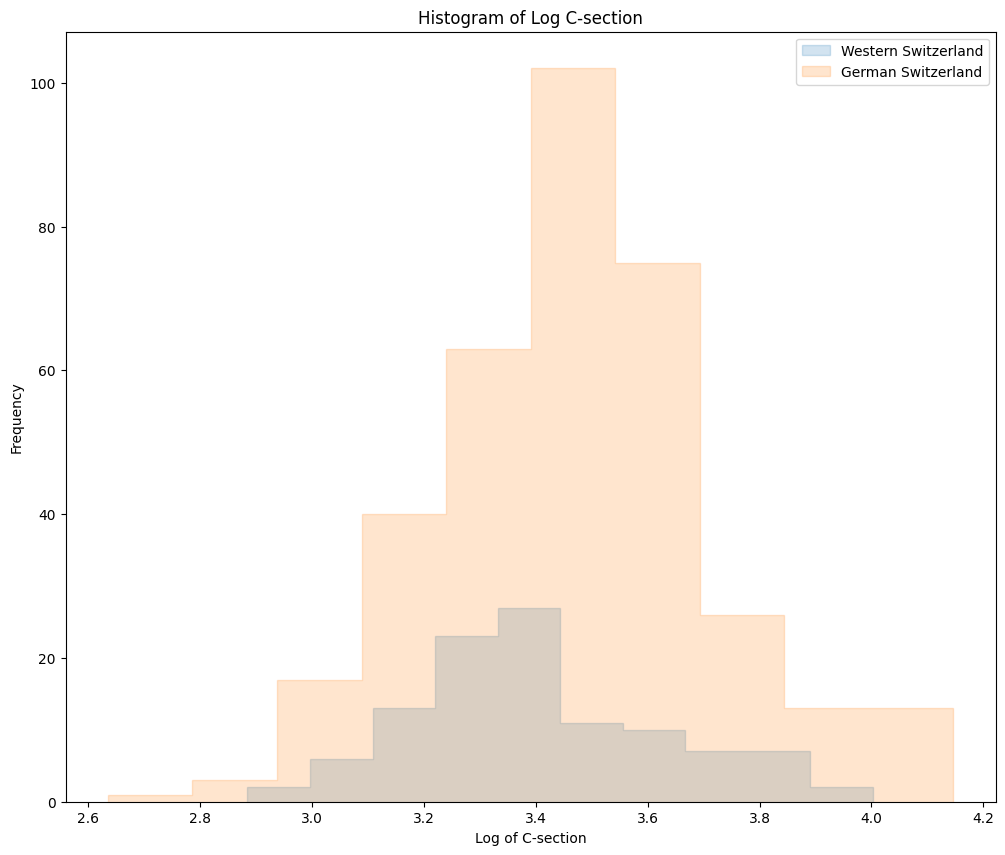

In [58]:
datasets = [df_Ro['log_c-section'], df_Al['log_c-section']]
dataset_labels = ['Western Switzerland', 'German Switzerland']
plt.figure(figsize=(12,10))
i=0
for dataset in datasets[0:2]:
    dataset.plot(kind="hist",fill=True,alpha=0.2,histtype='step',label=dataset_labels[i])
    #print('%10s %1.2f ' % (datasets_labels[i],p))
    i+=1
plt.legend()
plt.xlabel('Log of C-section')
plt.title('Histogram of Log C-section')

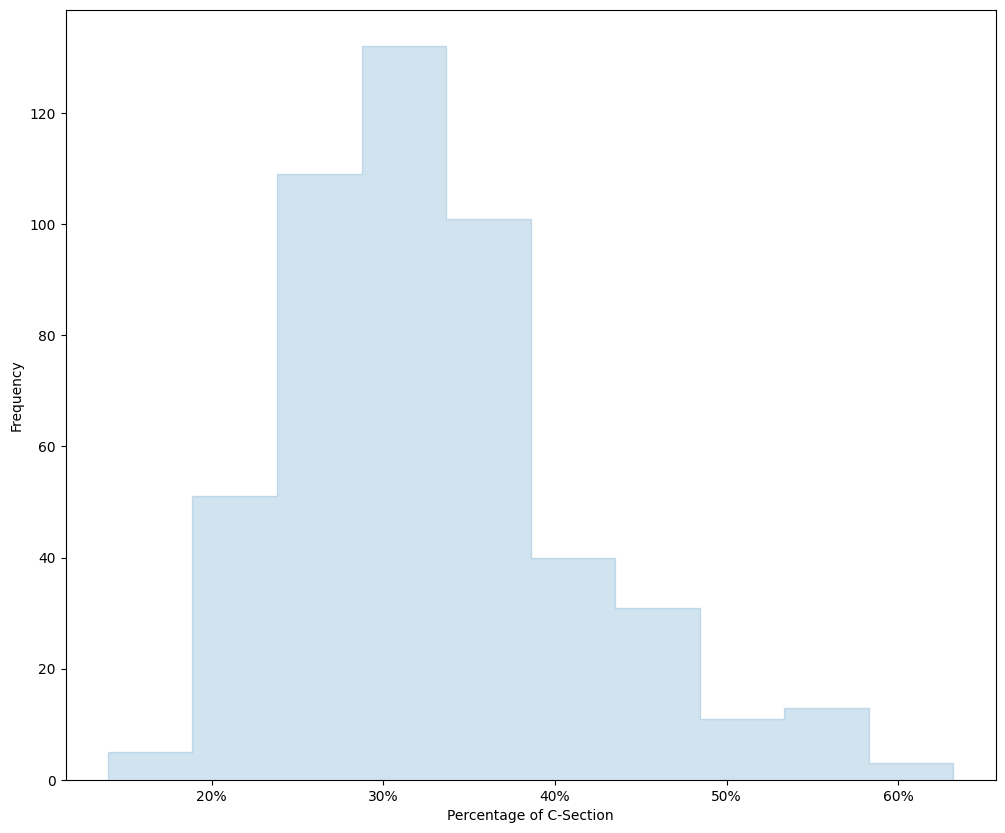

In [59]:
plt.figure(figsize=(12,10))
df['percentage_c-section'].plot(kind="hist",fill=True,alpha=0.2,histtype='step')
plt.xlabel('Percentage of C-Section')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

In [60]:
df['percentage_c-section'].describe()

count    496.000000
mean       0.329121
std        0.083338
min        0.139535
25%        0.267977
50%        0.317241
75%        0.370703
max        0.632056
Name: percentage_c-section, dtype: float64

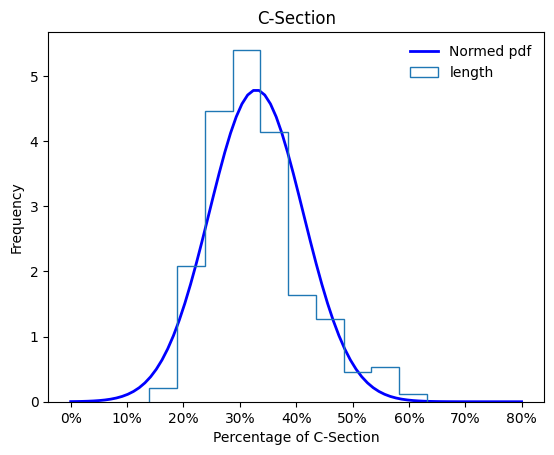

In [61]:
# Create figure and axis
fig, ax = plt.subplots(1,1)
mean = df['percentage_c-section'].describe()[1]
sd = df['percentage_c-section'].describe()[2]
x = np.linspace(0,0.8,80)
ax.plot(x, norm.pdf(x,mean,sd),'b-', lw=2, label='Normed pdf')
df['percentage_c-section'].plot(kind="hist",fill=False,histtype='step',title='C-Section', label="length", density="True")
ax.legend(loc='best', frameon=False)
plt.xlabel('Percentage of C-Section')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.show()

Text(0.5, 1.0, 'Hisogram of the Log C-section')

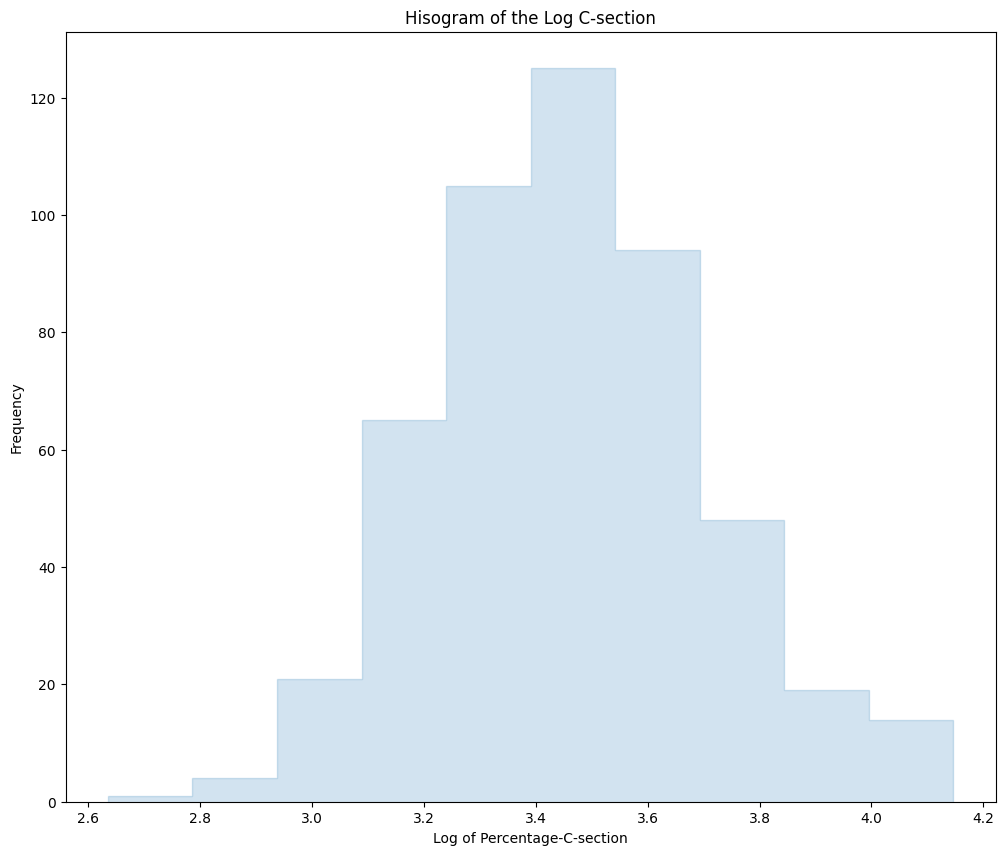

In [62]:
plt.figure(figsize=(12,10))
df['log_c-section'].plot(kind="hist",fill=True,alpha=0.2,histtype='step')
plt.xlabel('Log of Percentage-C-section')
plt.title('Hisogram of the Log C-section')

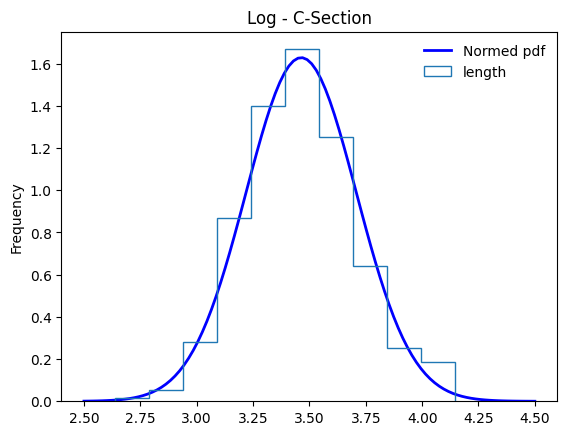

In [63]:
# Create figure and axis
fig, ax = plt.subplots(1,1)
mean = df['log_c-section'].describe()[1]
sd = df['log_c-section'].describe()[2]
x = np.linspace(2.5,4.5,100)
ax.plot(x, norm.pdf(x,mean,sd),'b-', lw=2, label='Normed pdf')
df['log_c-section'].plot(kind="hist",fill=False,histtype='step',title='Log - C-Section', label="length", density="True")
ax.legend(loc='best', frameon=False)
plt.show()

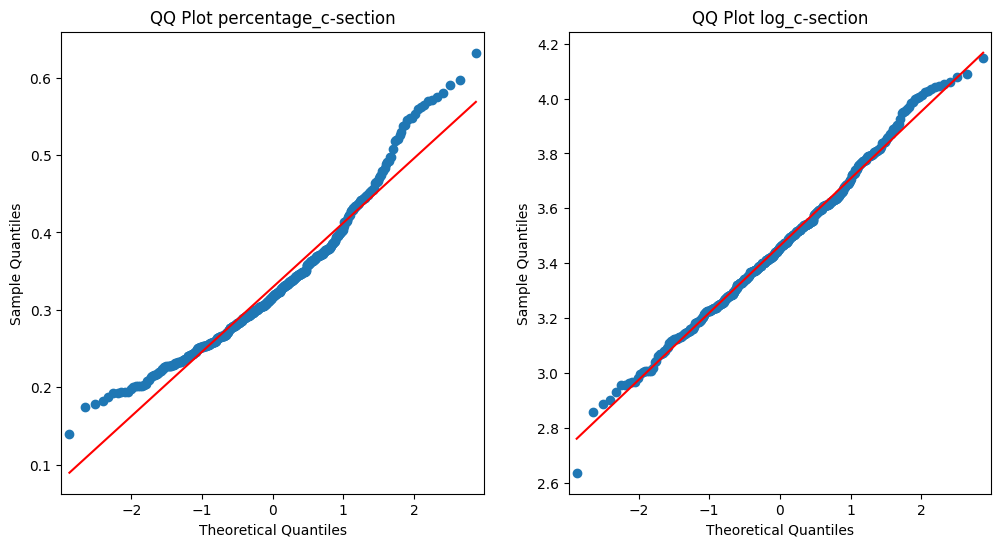

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sm.qqplot(df['percentage_c-section'], line='s', ax=ax1)
ax1.set_title('QQ Plot percentage_c-section')

sm.qqplot(df['log_c-section'], line='s', ax=ax2)
ax2.set_title('QQ Plot log_c-section')

plt.show()

In [65]:
k2, p = stats.normaltest(df_Ro['log_c-section']) # D Agostino-Pearson. The method returns the test statistic value and the p-value
alpha = 0.001 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis (data follow a normal distribution) can be rejected")
else:
  print("The null hypothesis (data follow a normal distribution) cannot be rejected")

Alpha =  0.001
p =  0.15430439260028875
The null hypothesis (data follow a normal distribution) cannot be rejected


In [66]:
k2, p = stats.normaltest(df_Al['log_c-section']) # D Agostino-Pearson. The method returns the test statistic value and the p-value
alpha = 0.001 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis (data follow a normal distribution) can be rejected")
else:
  print("The null hypothesis (data follow a normal distribution) cannot be rejected")

Alpha =  0.001
p =  0.3983540911480589
The null hypothesis (data follow a normal distribution) cannot be rejected


### Mann–Whitney U test

ability of X being greater than Y is equal to the probability of Y being greater than X.

The null hypothesis (H0) is that the two populations are equal.

The alternative hypothesis (H1) is that the two populations are not equal.

In [67]:
f, p = stats.mannwhitneyu(df_Ro['log_c-section'],df_Al['log_c-section'], alternative='two-sided')
print("There is %1.2f probability that's the null hypothesis is wrong" % ((1-p)*100))

There is 99.44 probability that's the null hypothesis is wrong


### ANOVA

In [68]:
f, p_value = stats.f_oneway(df_Ro['log_c-section'],df_Al['log_c-section'])
print('One way Anova: p = %1.3f' % p_value)

One way Anova: p = 0.018


### Welsch's t-test

In [69]:
f, p  = stats.ttest_ind(df_Ro['log_c-section'],df_Al['log_c-section'], equal_var = False, alternative='two-sided') # False means we don't assume equal variances (Welsch's t-test)
print('Welsch''s t-test: p = %1.3f' % p)

Welschs t-test: p = 0.013
